## (a) Gradient update $w^{[1]}_{1,2}$

First draw all the weight and bias relation:

<div style="text-align: center;">
    <img src="draw_simple_nn.png" width="300"/>
</div>

Then, we can eaily get:

$$
\begin{align*}

h_2 &= \sigma(x_1 w_{1,2}^{[1]} + x_2 w_{2,2}^{[1]} + w_0^{[2]}) \\\\

o &= \sigma ( h_2 w_2^{[2]} + w_0^{[2]} ) \\\\

&\text{And let:} \\\\

h_2^{(i)} &= x_1 w_{1,2}^{[1]} + x_2 w_{2,2}^{[1]} + w_0^{[2]} \\\\

o^{(i)} &=  h_2 w_2^{[2]} + w_0^{[2]}  \\\\

&\text{then use chain rule,} \\\\

\frac{\partial l}{\partial w^{[1]}_{1,2} } &= \frac{\partial h_2}{\partial w^{[1]}_{1,2} } \times \frac{\partial o}{\partial h_2} \times \frac{\partial l}{\partial o} \\\\

&\text{Then calculate derivative for each term,}\\\\

\frac{\partial l}{\partial o} &= ((o^{(i)} - y^{(i)})^2)' = 2(o^{(i)} - y^{(i)}) \times 1 \\\\

\frac{\partial o}{\partial h_2} &= \sigma' (o) \\
&= (h_2^{(i)} w_2^{[2]} + w_0^{[2]})( 1 - (h_2^{(i)} w_2^{[2]} + w_0^{[2]}) )w_2^{[2]} \\
&= o^{(i)}(1-o^{(i)}) w_2^{[2]} \\\\

\frac{\partial h_2}{\partial w^{[1]}_{1,2} } &= h_2^{(i)}(1 - h_2^{(i)}) x_1^{(i)} \\\\

&\text{Thus the gradient is:} \\\\

\frac{\partial l}{\partial w^{[1]}_{1,2} } &= \frac{2}{m} \sum^m_{i=1} (o^{(i)}-y^{(i)})o^{(i)} (1-o^{(i)}) w_2^{[2]} h_2^{(i)} (1-h_2^{(i)}) x_1^{(i)} \\\\

&= \frac{2 w_2^{[2]}}{m} \sum^m_{i=1} (o^{(i)}-y^{(i)})o^{(i)} (1-o^{(i)})  h_2^{(i)} (1-h_2^{(i)}) x_1^{(i)}

\end{align*}
$$


## (b)

Looking into the plot for dataset X, and the we can see the decision boundry is like a triangle, and the `step function` problem given just can differentiate those three sides, it can express horizotal by `x1`, vertial by `x2` and slope by `x1+x2`.


In [177]:
def example_weights():
    """This is an example function that returns weights.
    Use this function as a template for optimal_step_weights and optimal_sigmoid_weights.
    You do not need to modify this class for this assignment.
    """
    w = {}

    w["hidden_layer_0_1"] = 0
    w["hidden_layer_1_1"] = 0
    w["hidden_layer_2_1"] = 0
    w["hidden_layer_0_2"] = 0
    w["hidden_layer_1_2"] = 0
    w["hidden_layer_2_2"] = 0
    w["hidden_layer_0_3"] = 0
    w["hidden_layer_1_3"] = 0
    w["hidden_layer_2_3"] = 0

    w["output_layer_0"] = 0
    w["output_layer_1"] = 0
    w["output_layer_2"] = 0
    w["output_layer_3"] = 0

    return w

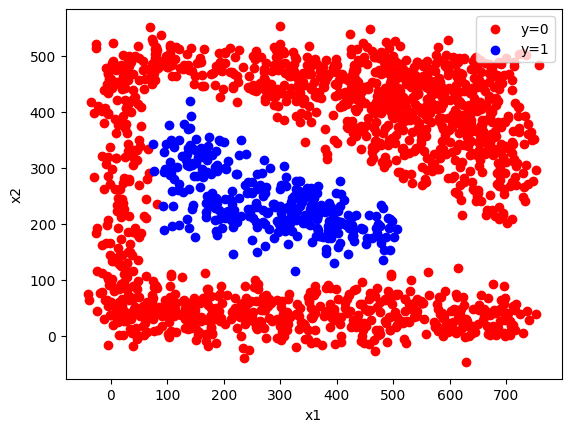

In [179]:
# Generate dataset

import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV file
X = pd.read_csv("./data/my_data.csv")


# Separate data into two groups based on the value of y
group0 = X[X["y"] == 0]
group1 = X[X["y"] == 1]

# Plot the two groups using different colors
plt.scatter(group0["x1"], group0["x2"], color="red", label="y=0")
plt.scatter(group1["x1"], group1["x2"], color="blue", label="y=1")

# Add labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

# Show plot
plt.show()

In [198]:
import numpy as np


def optimal_step_weights():
    """
    I made up some data...
    """
    w = example_weights()

    # *** START CODE HERE ***
    # h1 --x1
    w["hidden_layer_0_1"] = 100
    w["hidden_layer_1_1"] = 0
    w["hidden_layer_2_1"] = 1
    # h2 --x2
    w["hidden_layer_0_2"] = 150
    w["hidden_layer_1_2"] = 1
    w["hidden_layer_2_2"] = 0
    # h3 --x+y
    w["hidden_layer_0_3"] = 600
    w["hidden_layer_1_3"] = -1
    w["hidden_layer_2_3"] = 1.5

    # out
    w["output_layer_0"] = 0
    w["output_layer_1"] = -1
    w["output_layer_2"] = -1
    w["output_layer_3"] = -1
    # *** END CODE HERE ***

    return w


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def step_function(x):
    return (x >= 0).astype(int)


def neural_network(data, activate):
    x1, x2 = data["x1"], data["x2"]
    weights = optimal_step_weights()
    # Hidden layer
    h1 = activate(
        weights["hidden_layer_1_1"] * x1
        + weights["hidden_layer_2_1"] * x2
        + weights["hidden_layer_0_1"]
    )
    h2 = activate(
        weights["hidden_layer_1_2"] * x1
        + weights["hidden_layer_2_2"] * x2
        + weights["hidden_layer_0_2"]
    )
    h3 = activate(
        weights["hidden_layer_1_3"] * x1
        + weights["hidden_layer_2_3"] * x2
        + weights["hidden_layer_0_3"]
    )

    # Output layer
    y = activate(
        weights["output_layer_1"] * h1
        + weights["output_layer_2"] * h2
        + weights["output_layer_3"] * h3
        + weights["output_layer_0"]
    )

    return y

In [199]:
pred_y = neural_network(X, step_function)

correct = 0
for i in range(len(X["y"])):
    if X["y"][i] == pred_y[i]:
        correct += 1
accuracy = correct / len(X["y"])
print(f"Accuracy: {accuracy:.2f}, correct: {correct}")

Accuracy: 0.83, correct: 1503


## (c)

No, just one side, not enought might underfit.
